(solving-ivps-using-irk-methods-section)=
# Solving initial value problems using implicit Runge-Kutta methods

Recall that the [general form of a Runge-Kutta method](rk-definition) is

\begin{align*}
   y_{n+1} &= y_n + h \sum_{i=1}^s b_i k_i,\\
   k_i &= f(t_n +c_i h,y_n + h \sum_{j=1}^s a_{ij} k_j).
\end{align*}

To help simplify the calculations we let 

```{math}
:label: Yi-equation

Y_i = y_n +h \displaystyle\sum_{j=1}^s a_{ij} k_j
```

then we can write these equations as

\begin{align*}
   y_{n+1} &= y_n + h \sum_{i=1}^s b_i f(t_n + c_i h, Y_i),\\
   Y_i &= y_n + h \sum_{j=1}^s a_{ij} f(t_n + c_j h, Y_j).
\end{align*}

Expanding the summation in equation {eq}`Yi-equation` for each stage gives

```{math}
:label: irk-stage-values-equation

\begin{align*}
    Y_1 &= y_n + h(a_{11} f(t_n + c_1 h, Y_1) + a_{12} f(t_n + c_2 h, Y_2) + \cdots + a_{1s} f(t_n + c_s h, Y_s)), \\
    Y_2 &= y_n + h(a_{21} f(t_n + c_1 h, Y_1) + a_{22} f(t_n + c_2 h, Y_2) + \cdots + a_{2s} f(t_n + c_s h, Y_s)), \\
    & \vdots \\
    Y_s &= y_n + h(a_{s1} f(t_n + c_1 h, Y_1) + a_{s2} f(t_n + c_2 h, Y_2) + \cdots + a_{ss} f(t_n + c_s h, Y_s)), \\
\end{align*}
```

The values of $Y_1, Y_2, \ldots, Y_s$ are found by solving this system of equations. One way to do this is to estimate the values of $Y_i$ by assigning each a value and use the equations {eq}`irk-stage-values-equation` to calculate improved estimates. If we repeat this enough times then our estimations of $Y_i$ will be close to the actual values of $Y_i$. We cease iterations when the largest difference between two successive estimates is small

$$\max_i| Y_i^{(k+1)} - Y_i^{(k)}| < tol$$

where $Y_i^{(k+1)}$ and $Y_i^{(k)}$ are the new and old estimates respectively and $tol$ is a **convergence tolerance**. The value of $tol$ is arbitrary but we need it to be small enough to give good estimates of $Y_i$ but not so small that we are spending too much time calculating the iterations. A common default value for the tolerance is $tol=10^{-6}$.

````{admonition} Example 3.6
:class: seealso
:name: irk-example-1

The third-order Radau IA implicit Runge-Kutta method is defined by the following Butcher tableau

\begin{align*}
   \begin{array}{c|cc}
      0 & \frac{1}{4} & -\frac{1}{4} \\
      \frac{2}{3} & \frac{1}{4} & \frac{5}{12} \\ \hline
      & \frac{1}{4} & \frac{3}{4}
    \end{array}
\end{align*}

Use this method to calculate the solution of the following initial value problem using a step length of $h=0.2$ and a convergence tolerance of $tol=10^{-4}$.

\begin{align*}
    y' = ty, \qquad t\in [0,1], \qquad y(0)=1.
\end{align*}
 
```{dropdown} Solution

The stage values for the implicit method are

\begin{align*}
    Y_1 &= y_n + h(\tfrac{1}{4} f(t_n, Y_1) - \tfrac{1}{4} f(t_n + \tfrac{2}{3}h, Y_2)), \\
    Y_2 &= y_n + h(\tfrac{1}{4} f(t_n, Y_1) + \tfrac{5}{12} f(t_n + \tfrac{2}{3}h, Y_2))
\end{align*}

and since $f(t, y) = ty$ then

\begin{align*}
    Y_1 &= y_n + h(\tfrac{1}{4} t_n Y_1 - \tfrac{1}{4} (t_n + \tfrac{2}{3}h) Y_2), \\
    Y_2 &= y_n + h(\tfrac{1}{4} t_n Y_1 + \tfrac{5}{12} (t_n + \tfrac{2}{3}h) Y_2).
\end{align*}

If we use the initial estimates $Y_1 = Y_2 = 1$ then an improved estimate is

\begin{align*}
    Y_1 &= 1 + 0.2(\tfrac{1}{4} (0)(1) - \tfrac{1}{4} (0 + \tfrac{2}{3}(0.2)(1)) = 0.993333, \\
    Y_2 &= 1 + 0.2(\tfrac{1}{4} (0)(0.993333) + \tfrac{5}{12} (0 + \tfrac{2}{3}(0.2)(1)) = 1.011111.
\end{align*}

The maximum difference between the new and old estimates are

\begin{align*}
    \max(|0.993333 - 1|, |1.011111 - 1|) = 0.011111.
\end{align*}

Our convergence tolerance is $tol=10^{-4}$ and since $0.011111 > 10^{-4}$ our estimates are not close enough to the actual values of $Y_1$ and $Y_2$ so we calculate the estimates again.

\begin{align*}
    Y_1 &= 1 + 0.2(\tfrac{1}{4} (0)(0.993333) - \tfrac{1}{4} (0 + \tfrac{2}{3}(0.2)(1.011111)) = 0.993259, \\
    Y_2 &= 1 + 0.2(\tfrac{1}{4} (0)(0.993259) + \tfrac{5}{12} (0 + \tfrac{2}{3}(0.2)(1.011111)) = 1.011235.
\end{align*}

The difference between the new and old estimates are now

\begin{align*}
    \max(|0.993333 - 0.993259|, |1.011111 - 1.011235|) = 0.000123,
\end{align*}

and since $0.000123 > 10^{-4}$ the estimates are still not accurate enough so we calculate the estimates again.

\begin{align*}
    Y_1 &= 1 + 0.2(\tfrac{1}{4} (0)(0.993259) - \tfrac{1}{4} (0 + \tfrac{2}{3}(0.2)(1.011235)) = 0.993258, \\
    Y_2 &= 1 + 0.2(\tfrac{1}{4} (0)(0.993258) + \tfrac{5}{12} (0 + \tfrac{2}{3}(0.2)(1.011235)) = 1.011236.
\end{align*}

The difference between the new and old estimates are now

\begin{align*}
    \max(|0.993259 - 0.993258|, |1.011235 - 1.011236|) = 0.000001,
\end{align*}

and since $0.000001 < 10^{-4}$ so we are now satisfied that $Y_1 = 0.993258$ and $Y_2 = 1.011236$. The solution over a single step is 

\begin{align*}
    y_{n+1} &= y_n + h (\tfrac{1}{4} f(t_n, Y_1) + \tfrac{3}{4} f(t_n + \tfrac{2}{3}h, Y_2)), \\
    &= y_n + h (\tfrac{1}{4} t_n Y_1 + \tfrac{3}{4} (t_n + \tfrac{2}{3}h)Y_2),
\end{align*}

so

\begin{align*}
    y_1 &= 1 + 0.2(\tfrac{1}{4}(0)(0.993258) + \tfrac{3}{4}(\tfrac{2}{3}(0.2)(1.011236)) = 1.020225.
\end{align*}

The values of $t_n$, $y_n$, $Y_1$ and $Y_2$ for the full domain are tabulated below

| $n$ | $t_n$ | $y_n$ | $Y_1$ | $Y_2$|
|:--:|:--:|:--:|:--:|:--:|
| 0 |     0.00 |   1.0000 |   0.9933 |   1.0112 |
| 1 |     0.20 |   1.0202 |   1.0127 |   1.0598 |
| 2 |     0.40 |   1.0833 |   1.0740 |   1.1562 |
| 3 |     0.60 |   1.1973 |   1.1847 |   1.3131 |
| 4 |     0.80 |   1.3773 |   1.3592 |   1.5524 |
| 5 |     1.00 |   1.6490 | - | - |

```
````

## Python code

The code below defines the function `radauIA()` which calculates the third-order Radua IA solution to an initial value problem. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def radauIA(f, tspan, y0, h, tol=1e-6):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        Y1, Y2, Y1o, Y2o = np.ones(neq), np.ones(neq), np.ones(neq), np.ones(neq)
        for k in range(100):
            Y1 = y[n,:] + h * (1/4 * f(t[n], Y1) - 1/4 * f(t[n] + 2/3 * h, Y2))
            Y2 = y[n,:] + h * (1/4 * f(t[n], Y1) + 5/12 * f(t[n] + 2/3 * h, Y2))
            if max(np.amax(abs(Y1 - Y1o)), np.amax(abs(Y2 - Y2o))) < tol:
                break
            Y1o, Y2o = Y1, Y2

        y[n+1,:] = y[n,:] + h * (1/4 * f(t[n], Y1) + 3/4 * f(t[n] + 2/3 * h, Y2))
        
    return t, y  

The inputs are:

- `f` - the name of the ODE function to be solved;
- `tspan` - an array of two values defining the lower and upper boundaries of the $t$ domain;
- `y0` - an array of values containing the solution of the ODE at the initial value $t=a$;
- `h` - the step length used.
- `tol` - the convergence tolerance (optional, default is $tol=10^{-6}$)

`Y1`, `Y2`, `Y1o` and `Y2o` are current and old estimates of the stage values $Y_1$ and $Y_2$ which are calculated by iterating the stage value functions until either the maximum difference between the current and old values is less than `tol` or 100 iterations have been calculated.

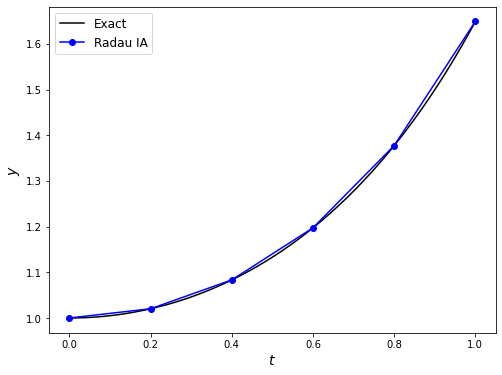

In [3]:
def f(t, y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length
tol = 1e-4      # convergence tolerance

# Solve IVP using the IRK method
t, y = radauIA(f, tspan, y0, h, tol)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="Radau IA")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

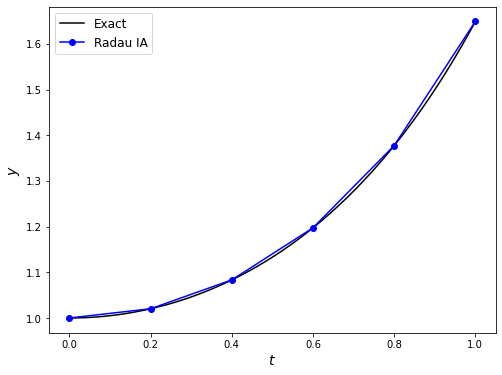

In [4]:
from myst_nb import glue
glue("irk_example_1_plot", fig, display=False)

The computed solutions using the implicit method are plotted in {numref}`irk-example-1-figure` below.

```{glue:figure} irk_example_1_plot
:name: irk-example-1-figure

Solution of the initial value problem $y'=ty$, $t\in[0,1]$, $y(0)=1$ using the implicit method from the [example](irk-example-1) with a step length $h=0.2$.
```

```{note}
The method used to calculate the stage values $Y_i$ here is an iterative method known as the [Gauss-Seidel method](gauss-seidel-method-section). This is not the most efficient method available to estimate the stage values and in practice [Newtons method](https://en.wikipedia.org/wiki/Newton%27s_method) is preferred since it is more efficient. However this requires calculation of a matrix of derivatives of $f(t,y)$ known as a [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant), and whilst not a particularly difficult to calculate, it can complicate the code somewhat especially when solving a system of ODEs. Therefore, here we only use the Gauss-Seidel method.
```